In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X = train.drop("label", axis=1).values
y = train["label"].values

Using GPU
Epoch 1/10
197/197 [==============================] - 59s 285ms/step - loss: 84614692864.0000 - accuracy: 0.1032 - val_loss: 1460654720.0000 - val_accuracy: 0.1129
Epoch 2/10
197/197 [==============================] - 57s 288ms/step - loss: 108371368.0000 - accuracy: 0.1686 - val_loss: 10704319.0000 - val_accuracy: 0.2990
Epoch 3/10
197/197 [==============================] - 57s 289ms/step - loss: 9990976.0000 - accuracy: 0.2850 - val_loss: 6776358.0000 - val_accuracy: 0.3532
Epoch 4/10
197/197 [==============================] - 58s 293ms/step - loss: 6994957.0000 - accuracy: 0.3111 - val_loss: 4822544.5000 - val_accuracy: 0.3648
Epoch 5/10
197/197 [==============================] - 58s 296ms/step - loss: 5791505.5000 - accuracy: 0.3075 - val_loss: 3697108.2500 - val_accuracy: 0.3837
Epoch 6/10
197/197 [==============================] - 59s 300ms/step - loss: 4810077.0000 - accuracy: 0.3053 - val_loss: 4035535.5000 - val_accuracy: 0.3273
Epoch 7/10
197/197 [==================

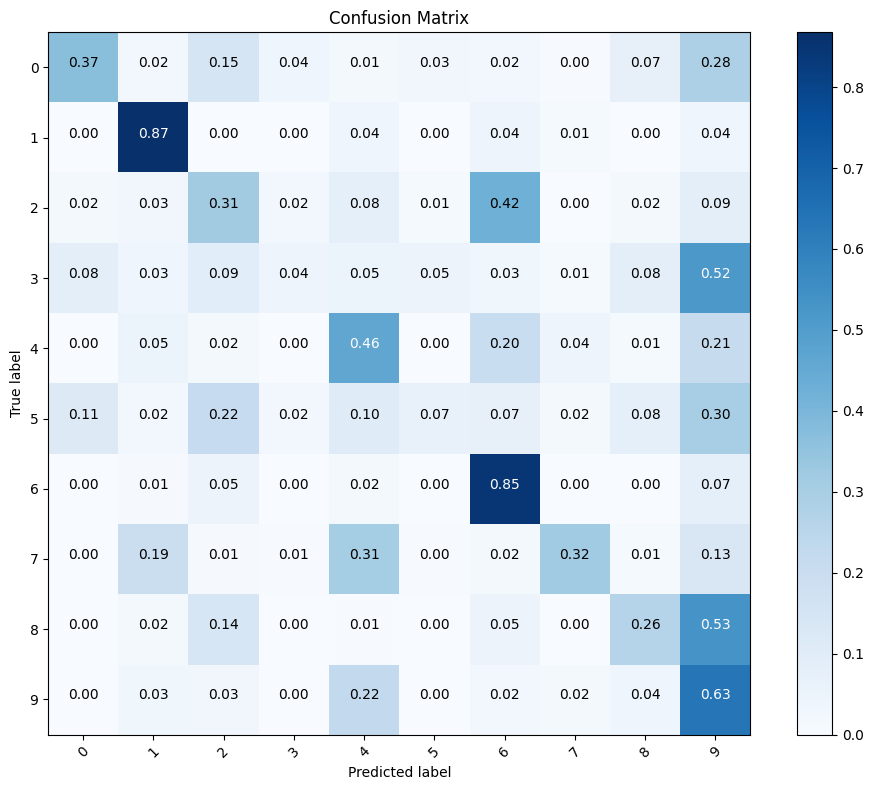

Final Test Accuracy: 0.4245
{'Final Test Accuracy': 0.42446428571428574}


In [29]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def inception_stem(input_tensor):
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid')(input_tensor)
    x = layers.Conv2D(32, (3, 3), padding='valid')(x)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    
    branch_1 = layers.MaxPooling2D((3, 3), strides=(1, 1))(x)
    branch_2 = layers.Conv2D(96, (3, 3), strides=(1, 1), padding='valid')(x)
    
    x = layers.concatenate([branch_1, branch_2], axis=-1)
    
    branch_1 = layers.Conv2D(64, (1, 1), padding='same')(x)
    branch_1 = layers.Conv2D(96, (3, 3), padding='valid')(branch_1)
    
    branch_2 = layers.Conv2D(64, (1, 1), padding='same')(x)
    branch_2 = layers.Conv2D(64, (7, 1), padding='same')(branch_2)
    branch_2 = layers.Conv2D(64, (1, 7), padding='same')(branch_2)
    branch_2 = layers.Conv2D(96, (3, 3), padding='valid')(branch_2)
    
    x = layers.concatenate([branch_1, branch_2], axis=-1)
    
    branch_1 = layers.Conv2D(192, (3, 3), strides=(1, 1), padding='valid')(x)
    branch_2 = layers.MaxPooling2D((3, 3), strides=(1, 1))(x)
    
    x = layers.concatenate([branch_1, branch_2], axis=-1)
    
    return x

def inception_A(input_tensor):
    branch_1 = layers.Conv2D(96, (1, 1), padding='same')(input_tensor)
    
    branch_2 = layers.Conv2D(64, (1, 1), padding='same')(input_tensor)
    branch_2 = layers.Conv2D(96, (3, 3), padding='same')(branch_2)
    
    branch_3 = layers.Conv2D(64, (1, 1), padding='same')(input_tensor)
    branch_3 = layers.Conv2D(96, (3, 3), padding='same')(branch_3)
    branch_3 = layers.Conv2D(96, (3, 3), padding='same')(branch_3)
    
    branch_4 = layers.AveragePooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    branch_4 = layers.Conv2D(96, (1, 1), padding='same')(branch_4)
    
    x = layers.concatenate([branch_1, branch_2, branch_3, branch_4], axis=-1)
    
    return x

def reduction_A(input_tensor):
    branch_1 = layers.MaxPooling2D((3, 3), strides=(2, 2))(input_tensor)
    
    branch_2 = layers.Conv2D(384, (3, 3), strides=(2, 2), padding='valid')(input_tensor)
    
    branch_3 = layers.Conv2D(192, (1, 1), padding='same')(input_tensor)
    branch_3 = layers.Conv2D(224, (3, 3), padding='same')(branch_3)
    branch_3 = layers.Conv2D(256, (3, 3), strides=(2, 2), padding='valid')(branch_3)
    
    x = layers.concatenate([branch_1, branch_2, branch_3], axis=-1)
    
    return x

def inception_B(input_tensor):
    branch_1 = layers.Conv2D(384, (1, 1), padding='same')(input_tensor)
    
    branch_2 = layers.Conv2D(192, (1, 1), padding='same')(input_tensor)
    branch_2 = layers.Conv2D(224, (1, 7), padding='same')(branch_2)
    branch_2 = layers.Conv2D(256, (7, 1), padding='same')(branch_2)
    
    branch_3 = layers.Conv2D(192, (1, 1), padding='same')(input_tensor)
    branch_3 = layers.Conv2D(192, (7, 1), padding='same')(branch_3)
    branch_3 = layers.Conv2D(224, (1, 7), padding='same')(branch_3)
    branch_3 = layers.Conv2D(224, (7, 1), padding='same')(branch_3)
    branch_3 = layers.Conv2D(256, (1, 7), padding='same')(branch_3)
    
    branch_4 = layers.AveragePooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    branch_4 = layers.Conv2D(128, (1, 1), padding='same')(branch_4)
    
    x = layers.concatenate([branch_1, branch_2, branch_3, branch_4], axis=-1)
    
    return x

def reduction_B(input_tensor):
    branch_1 = layers.MaxPooling2D((3, 3), strides=(2, 2))(input_tensor)
    
    branch_2 = layers.Conv2D(192, (1, 1), padding='same')(input_tensor)
    branch_2 = layers.Conv2D(192, (3, 3), strides=(2, 2), padding='valid')(branch_2)
    
    branch_3 = layers.Conv2D(256, (1, 1), padding='same')(input_tensor)
    branch_3 = layers.Conv2D(256, (7, 1), padding='same')(branch_3)
    branch_3 = layers.Conv2D(320, (1, 7), padding='same')(branch_3)
    branch_3 = layers.Conv2D(320, (3, 3), strides=(2, 2), padding='valid')(branch_3)
    
    x = layers.concatenate([branch_1, branch_2, branch_3], axis=-1)
    
    return x

def inception_C(input_tensor):
    branch_1 = layers.Conv2D(256, (1, 1), padding='same')(input_tensor)
    
    branch_2 = layers.Conv2D(384, (1, 1), padding='same')(input_tensor)
    branch_2a = layers.Conv2D(256, (1, 3), padding='same')(branch_2)
    branch_2b = layers.Conv2D(256, (3, 1), padding='same')(branch_2)
    branch_2 = layers.concatenate([branch_2a, branch_2b], axis=-1)
    
    branch_3 = layers.Conv2D(384, (1, 1), padding='same')(input_tensor)
    branch_3 = layers.Conv2D(448, (3, 1), padding='same')(branch_3)
    branch_3 = layers.Conv2D(512, (1, 3), padding='same')(branch_3)
    branch_3a = layers.Conv2D(256, (1, 3), padding='same')(branch_3)
    branch_3b = layers.Conv2D(256, (3, 1), padding='same')(branch_3)
    branch_3 = layers.concatenate([branch_3a, branch_3b], axis=-1)
    
    branch_4 = layers.AveragePooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    branch_4 = layers.Conv2D(256, (1, 1), padding='same')(branch_4)
    
    x = layers.concatenate([branch_1, branch_2, branch_3, branch_4], axis=-1)
    
    return x

def inception_v4(input_shape=(28, 28, 1), num_classes=10):
    input_tensor = layers.Input(shape=input_shape)
    
    x = inception_stem(input_tensor)
    
    for _ in range(1):
        x = inception_A(x)
    
    x = reduction_A(x)
    
    for _ in range(2):
        x = inception_B(x)
    
    x = reduction_B(x)
    
    for _ in range(1):
        x = inception_C(x)
    
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    output_tensor = layers.Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    return model

class CNNWrapper:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.history = None
        self.model = None

    def prepare_data(self):
        lb = LabelBinarizer()
        y = lb.fit_transform(self.y)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, y, test_size=0.4, random_state=42, stratify=self.y)
        self.X_train = self.X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
        self.X_test = self.X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    def create_model(self):
        self.model = inception_v4()
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    def train_model(self):
        self.prepare_data()
        self.create_model()

        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            print("Using GPU")
        else:
            print("No GPU found, using CPU")
        
        self.history = self.model.fit(
            self.X_train, self.y_train,
            epochs=10,
            validation_data=(self.X_test, self.y_test),
            verbose=1,
            batch_size=128
        )
    
    def evaluate_model(self):
        y_pred_proba = self.model.predict(self.X_test)
        y_pred_classes = np.argmax(y_pred_proba, axis=1)

        y_true = np.argmax(self.y_test, axis=1)
        test_accuracy = accuracy_score(y_true, y_pred_classes)

        results = {
            "Final Test Accuracy": test_accuracy
        }

        self.results = results
        self.plot_confusion_matrix(y_true, y_pred_classes)
        print(f"Final Test Accuracy: {test_accuracy:.4f}")

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred, normalize='true')
        plt.figure(figsize=(10, 8))
        plt.imshow(cm, interpolation='nearest', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(len(np.unique(y_true)))
        plt.xticks(tick_marks, tick_marks, rotation=45)
        plt.yticks(tick_marks, tick_marks)

        fmt = '.2f'
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    def predict(self, X_new_df, save_csv=False):
        X_new = X_new_df.values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
        predictions = self.model.predict(X_new)
        predicted_classes = np.argmax(predictions, axis=1)
        
        results_df = pd.DataFrame({'ImageId': np.arange(1, len(predicted_classes) + 1), 'Label': predicted_classes})
        
        if save_csv:
            results_df.to_csv("submission.csv", index=False)
        
        return results_df

    def print_results(self):
        print(self.results)


cnn_wrapper = CNNWrapper(X, y)
cnn_wrapper.train_model()
cnn_wrapper.evaluate_model()
cnn_wrapper.print_results()


Using GPU
Epoch 1/50
197/197 - 6s - loss: 0.4122 - accuracy: 0.8686 - val_loss: 15.3691 - val_accuracy: 0.1115 - 6s/epoch - 29ms/step
Epoch 2/50
197/197 - 4s - loss: 0.0980 - accuracy: 0.9688 - val_loss: 10.2654 - val_accuracy: 0.1115 - 4s/epoch - 23ms/step
Epoch 3/50
197/197 - 4s - loss: 0.0723 - accuracy: 0.9774 - val_loss: 0.3063 - val_accuracy: 0.9195 - 4s/epoch - 23ms/step
Epoch 4/50
197/197 - 4s - loss: 0.0540 - accuracy: 0.9836 - val_loss: 0.0590 - val_accuracy: 0.9818 - 4s/epoch - 23ms/step
Epoch 5/50
197/197 - 4s - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0541 - val_accuracy: 0.9846 - 4s/epoch - 23ms/step
Epoch 6/50
197/197 - 4s - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0359 - val_accuracy: 0.9895 - 4s/epoch - 23ms/step
Epoch 7/50
197/197 - 5s - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0358 - val_accuracy: 0.9895 - 5s/epoch - 23ms/step
Epoch 8/50
197/197 - 5s - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0390 - val_accuracy: 0.9889 - 5s/epoch - 23ms/step
Epoc

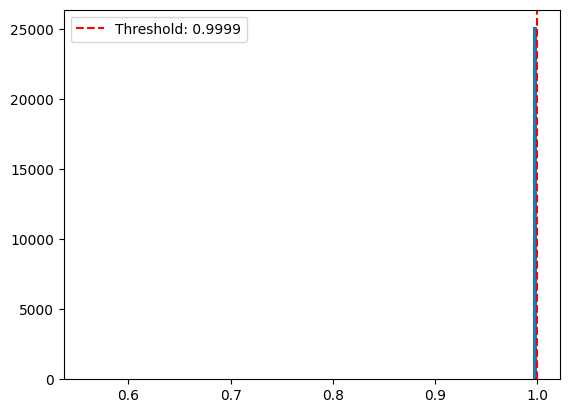

24200 1000
Epoch 1/500

Epoch 1: val_accuracy improved from -inf to 0.11155, saving model to best_model.h5
190/190 - 6s - loss: 0.3707 - accuracy: 0.8823 - val_loss: 12.7895 - val_accuracy: 0.1115 - 6s/epoch - 30ms/step
Epoch 2/500

Epoch 2: val_accuracy improved from 0.11155 to 0.11601, saving model to best_model.h5
190/190 - 5s - loss: 0.0693 - accuracy: 0.9790 - val_loss: 5.8094 - val_accuracy: 0.1160 - 5s/epoch - 24ms/step
Epoch 3/500

Epoch 3: val_accuracy improved from 0.11601 to 0.92762, saving model to best_model.h5
190/190 - 5s - loss: 0.0533 - accuracy: 0.9835 - val_loss: 0.2429 - val_accuracy: 0.9276 - 5s/epoch - 24ms/step
Epoch 4/500

Epoch 4: val_accuracy improved from 0.92762 to 0.98339, saving model to best_model.h5
190/190 - 5s - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0599 - val_accuracy: 0.9834 - 5s/epoch - 24ms/step
Epoch 5/500

Epoch 5: val_accuracy did not improve from 0.98339
190/190 - 4s - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0644 - val_accuracy: 0

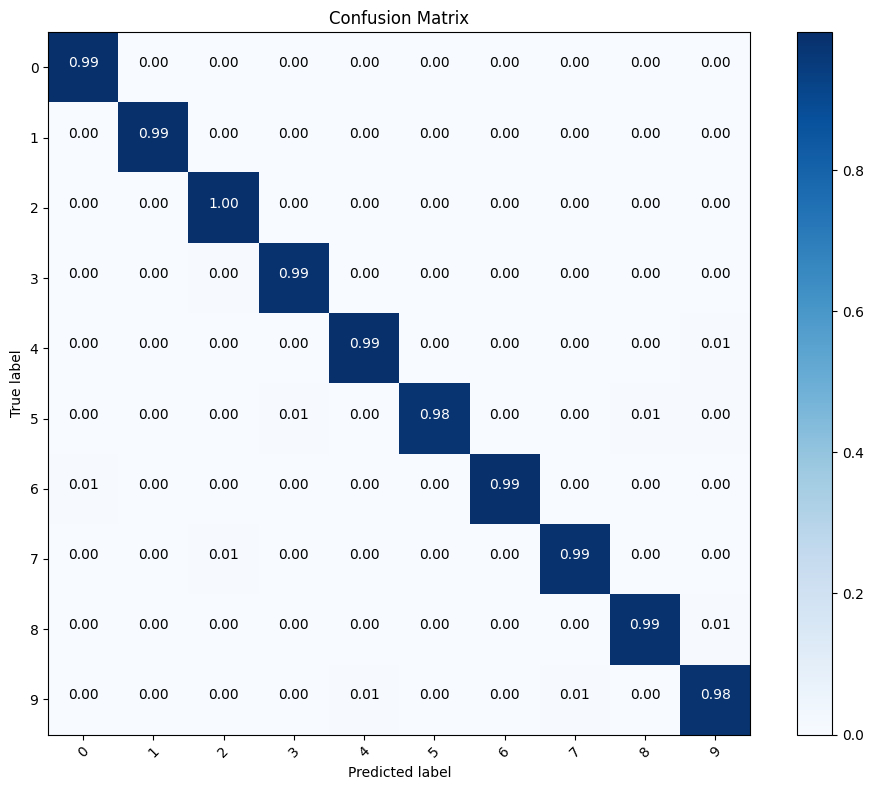

Final Test Accuracy: 0.9880
{'Final Test Accuracy': 0.9880357142857142}


In [24]:
class CNN2Wrapper:
    def __init__(self, X, y, threshold=0.7):
        """
        Initialize the CNN2Wrapper with training data.

        Parameters:
        X (np.ndarray): The training features.
        y (np.ndarray): The training labels.
        threshold (float): The confidence threshold to split the dataset.
        """
        self.X = X
        self.y = y
        self.threshold = threshold
        self.results = {}
        self.history = None
        self.model = None
        self.second_model = None
        self.best_model_path = 'best_model.h5'
        self.best_model_path_second = 'best_model_second.h5'

    def prepare_data(self):
        """
        Prepare the data for training and testing.
        """
        lb = LabelBinarizer()
        y = lb.fit_transform(self.y)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, y, test_size=0.4, random_state=42, stratify=self.y)
        self.X_train = self.X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
        self.X_test = self.X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    def create_cnn_model_2(self):
        """
        Create the CNN model.
        """
        model = Sequential([
            Input(shape=(28, 28, 1)),
            Conv2D(128, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.2),

            Conv2D(128, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.2),

            Conv2D(256, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.3),

            Conv2D(512, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.2),

            Flatten(),
            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(256, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def train_models(self):
        """
        Train two models: one on high-confidence data and one on low-confidence data.
        """
        self.prepare_data()
        self.model = self.create_cnn_model_2()

        # To ensure TensorFlow uses the GPU if available
        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            print("Using GPU")
        else:
            print("No GPU found, using CPU")
        
        self.history = self.model.fit(
            self.X_train, self.y_train,
            epochs=50,  # A few epochs just to get the split
            validation_data=(self.X_test, self.y_test),
            verbose=2,
            batch_size=128
        )
        
        # Get the prediction probabilities on the training data
        train_pred_proba = self.model.predict(self.X_train)
        
        # Get the maximum probability for each prediction
        max_proba = np.max(train_pred_proba, axis=1)
        
        # Sort the probabilities to find the threshold that results in exactly 1,000 low-confidence predictions
        sorted_proba = np.sort(max_proba)
        self.threshold = sorted_proba[1000]  # The threshold is set to the 1000th lowest probability
        
        plt.hist(max_proba, bins=100)
        plt.axvline(x=self.threshold, color='r', linestyle='--', label=f'Threshold: {self.threshold:.4f}')
        plt.legend()
        plt.show()
        
        # Split the training data based on the dynamically set threshold
        high_confidence_indices = max_proba >= self.threshold
        low_confidence_indices = max_proba < self.threshold
        
        X_train_high = self.X_train[high_confidence_indices]
        y_train_high = self.y_train[high_confidence_indices]
        
        X_train_low = self.X_train[low_confidence_indices]
        y_train_low = self.y_train[low_confidence_indices]

        print(len(X_train_high), len(X_train_low))
        checkpoint = ModelCheckpoint(self.best_model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=3)

        # Train the first model on high-confidence data
        self.model = self.create_cnn_model_2()
        self.history = self.model.fit(
            X_train_high, y_train_high,
            epochs=500,
            validation_data=(self.X_test, self.y_test),
            callbacks=[checkpoint],
            verbose=2,
            batch_size=128
        )

        # Train the second model on low-confidence data
        self.second_model = self.create_cnn_model_2()
        checkpoint_second = ModelCheckpoint(self.best_model_path_second, monitor='val_accuracy', save_best_only=True, mode='max', verbose=3)
        self.history_second = self.second_model.fit(
            X_train_low, y_train_low,
            epochs=500,
            validation_data=(self.X_test, self.y_test),
            callbacks=[checkpoint_second],
            verbose=2,
            batch_size=128
        )

        # Load the best models
        self.model = tf.keras.models.load_model(self.best_model_path)
        self.second_model = tf.keras.models.load_model(self.best_model_path_second)

    def evaluate_models(self):
        """
        Evaluate both models together as if they are one model.
        """
        y_pred_proba = self.model.predict(self.X_test)
        max_proba = np.max(y_pred_proba, axis=1)
        y_pred_classes = np.argmax(y_pred_proba, axis=1)

        # Identify low-confidence predictions and use the second model
        low_confidence_indices = max_proba < self.threshold
        if np.any(low_confidence_indices):
            X_test_low = self.X_test[low_confidence_indices]
            second_pred_proba = self.second_model.predict(X_test_low)
            second_pred_classes = np.argmax(second_pred_proba, axis=1)
            y_pred_classes[low_confidence_indices] = second_pred_classes

        y_true = np.argmax(self.y_test, axis=1)
        test_accuracy = accuracy_score(y_true, y_pred_classes)

        results = {
            "Final Test Accuracy": test_accuracy
        }

        self.results = results
        self.plot_confusion_matrix(y_true, y_pred_classes)
        print(f"Final Test Accuracy: {test_accuracy:.4f}")

    def plot_confusion_matrix(self, y_true, y_pred):
        """
        Plot the confusion matrix with proportions.
        """
        cm = confusion_matrix(y_true, y_pred, normalize='true')
        plt.figure(figsize=(10, 8))
        plt.imshow(cm, interpolation='nearest', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(len(np.unique(y_true)))
        plt.xticks(tick_marks, tick_marks, rotation=45)
        plt.yticks(tick_marks, tick_marks)

        fmt = '.2f'
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    def predict(self, X_new_df, save_csv=False):
        """
        Predict the class for new data and add a label column with the predicted class.

        Parameters:
        X_new_df (pd.DataFrame): The new data as a DataFrame.
        save_csv (bool): Whether to save the predictions as a CSV file.

        Returns:
        pd.DataFrame: The DataFrame with columns 'ImageId' and 'Label'.
        """
        X_new = X_new_df.values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
        predictions = self.model.predict(X_new)
        max_proba = np.max(predictions, axis=1)
        predicted_classes = np.argmax(predictions, axis=1)
        
        # Handle low-confidence predictions
        low_confidence_indices = max_proba < self.threshold
        if np.any(low_confidence_indices) and self.second_model is not None:
            low_confidence_data = X_new[low_confidence_indices]
            second_predictions = self.second_model.predict(low_confidence_data)
            second_predicted_classes = np.argmax(second_predictions, axis=1)
            
            # Replace low-confidence predictions with the second model's predictions
            predicted_classes[low_confidence_indices] = second_predicted_classes
        
        results_df = pd.DataFrame({'ImageId': np.arange(1, len(predicted_classes) + 1), 'Label': predicted_classes})
        
        if save_csv:
            results_df.to_csv("submission.csv", index=False)
        
        return results_df

    def print_results(self):
        """
        Print the results of the models.
        """
        print(self.results)


cnn2_wrapper = CNN2Wrapper(X, y, threshold=0.9975)
cnn2_wrapper.train_models()
cnn2_wrapper.evaluate_models()
cnn2_wrapper.print_results()


In [8]:
class CNN2Wrapper:
    def __init__(self, X, y):
        """
        Initialize the CNN2Wrapper with training data.

        Parameters:
        X (np.ndarray): The training features.
        y (np.ndarray): The training labels.
        """
        self.X = X
        self.y = y
        self.results = {}
        self.history = None
        self.model = None
        self.best_model_path = 'best_model.h5'

    def prepare_data(self):
        """
        Prepare the data for training and testing.
        """
        lb = LabelBinarizer()
        y = lb.fit_transform(self.y)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, y, test_size=0.4, random_state=42, stratify=self.y)
        self.X_train = self.X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
        self.X_test = self.X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    def create_cnn_model_2(self):
        """
        Create the second CNN model.
        """
        model = Sequential([
            Input(shape=(28, 28, 1)),
            Conv2D(128, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.2),

            Conv2D(128, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.2),

            Conv2D(256, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.3),

            Conv2D(512, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.2),

            Flatten(),
            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(256, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def evaluate_model(self):
        """
        Train and evaluate the CNN2 model.
        """
        self.prepare_data()
        self.model = self.create_cnn_model_2()
        
        # To ensure TensorFlow uses the GPU if available
        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            print("Using GPU")
        else:
            print("No GPU found, using CPU")

        # Create a callback to save the best model based on validation accuracy
        checkpoint = ModelCheckpoint(self.best_model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=3)

        self.history = self.model.fit(
            self.X_train, self.y_train,
            epochs=1000,
            validation_data=(self.X_test, self.y_test),
            callbacks=[checkpoint],
            verbose=2,
            batch_size=128
        )
        
        # Load the best model
        self.model = tf.keras.models.load_model(self.best_model_path)

        y_pred = self.model.predict(self.X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(self.y_test, axis=1)

        test_accuracy = accuracy_score(y_true, y_pred_classes)

        results = {
            "Test Accuracy": test_accuracy,
            "Training Loss": self.history.history['loss'][-1],
            "Validation Loss": self.history.history['val_loss'][-1]
        }

        self.results = results

        self.plot_history()
        self.plot_confusion_matrix(y_true, y_pred_classes)

    def plot_history(self):
        """
        Plot the training and validation loss and accuracy.
        """
        plt.figure(figsize=(12, 4))
        
        # Plot training & validation loss values
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='upper right')

        # Plot training & validation accuracy values
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['accuracy'], label='Training Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        
        plt.show()

    def plot_confusion_matrix(self, y_true, y_pred):
        """
        Plot the confusion matrix with proportions.
        """
        cm = confusion_matrix(y_true, y_pred, normalize='true')
        plt.figure(figsize=(10, 8))
        plt.imshow(cm, interpolation='nearest', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(len(np.unique(y_true)))
        plt.xticks(tick_marks, tick_marks, rotation=45)
        plt.yticks(tick_marks, tick_marks)

        fmt = '.2f'
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    def predict(self, X_new_df, save_csv=False):
        """
        Predict the class for new data and add a label column with the predicted class.

        Parameters:
        X_new_df (pd.DataFrame): The new data as a DataFrame.
        save_csv (bool): Whether to save the predictions as a CSV file.

        Returns:
        pd.DataFrame: The DataFrame with columns 'ImageId' and 'Label'.
        """
        X_new = X_new_df.values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
        predictions = self.model.predict(X_new)
        predicted_classes = np.argmax(predictions, axis=1)
        
        results_df = pd.DataFrame({'ImageId': np.arange(1, len(predicted_classes) + 1), 'Label': predicted_classes})
        
        if save_csv:
            results_df.to_csv("submission.csv", index=False)
        
        return results_df

    def print_results(self):
        """
        Print the results of the models.
        """
        print(self.results)




cnn2_wrapper = CNN2Wrapper(X, y)
cnn2_wrapper.evaluate_model()
cnn2_wrapper.print_results()


Using GPU
Epoch 1/1000

Epoch 1: val_accuracy improved from -inf to 0.11155, saving model to best_model.h5
197/197 - 6s - loss: 0.4208 - accuracy: 0.8681 - val_loss: 12.8074 - val_accuracy: 0.1115 - 6s/epoch - 29ms/step
Epoch 2/1000

Epoch 2: val_accuracy improved from 0.11155 to 0.14327, saving model to best_model.h5
197/197 - 5s - loss: 0.0988 - accuracy: 0.9696 - val_loss: 4.8733 - val_accuracy: 0.1433 - 5s/epoch - 23ms/step
Epoch 3/1000

Epoch 3: val_accuracy improved from 0.14327 to 0.95036, saving model to best_model.h5
197/197 - 4s - loss: 0.0719 - accuracy: 0.9771 - val_loss: 0.1695 - val_accuracy: 0.9504 - 4s/epoch - 23ms/step
Epoch 4/1000

Epoch 4: val_accuracy improved from 0.95036 to 0.98292, saving model to best_model.h5
197/197 - 5s - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.0595 - val_accuracy: 0.9829 - 5s/epoch - 23ms/step
Epoch 5/1000

Epoch 5: val_accuracy improved from 0.98292 to 0.98762, saving model to best_model.h5
197/197 - 5s - loss: 0.0469 - accuracy: 0.98

KeyboardInterrupt: 

In [40]:
cnn2_wrapper.predict(test, True)

875/875 [==============================] - 2s 2ms/step


ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]

Using GPU
Epoch 1/100
394/394 [==============================] - ETA: 0s - loss: 0.9908 - accuracy: 0.6769
Epoch 1: val_accuracy improved from -inf to 0.84286, saving model to best_model.h5
394/394 [==============================] - 13s 23ms/step - loss: 0.9908 - accuracy: 0.6769 - val_loss: 0.5196 - val_accuracy: 0.8429
Epoch 2/100
391/394 [============================>.] - ETA: 0s - loss: 0.5859 - accuracy: 0.8129
Epoch 2: val_accuracy did not improve from 0.84286
394/394 [==============================] - 8s 20ms/step - loss: 0.5862 - accuracy: 0.8130 - val_loss: 0.4865 - val_accuracy: 0.8396
Epoch 3/100
393/394 [============================>.] - ETA: 0s - loss: 0.4974 - accuracy: 0.8395
Epoch 3: val_accuracy improved from 0.84286 to 0.88774, saving model to best_model.h5
394/394 [==============================] - 8s 20ms/step - loss: 0.4978 - accuracy: 0.8394 - val_loss: 0.3642 - val_accuracy: 0.8877
Epoch 4/100
390/394 [============================>.] - ETA: 0s - loss: 0.4654 - ac

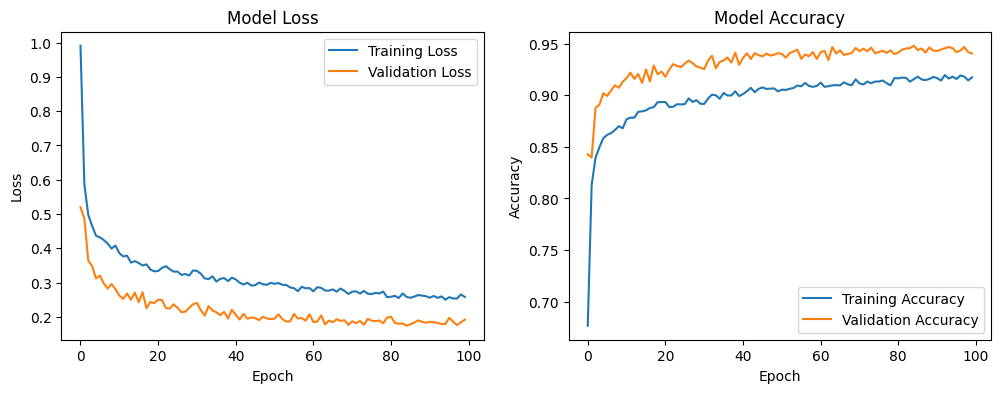

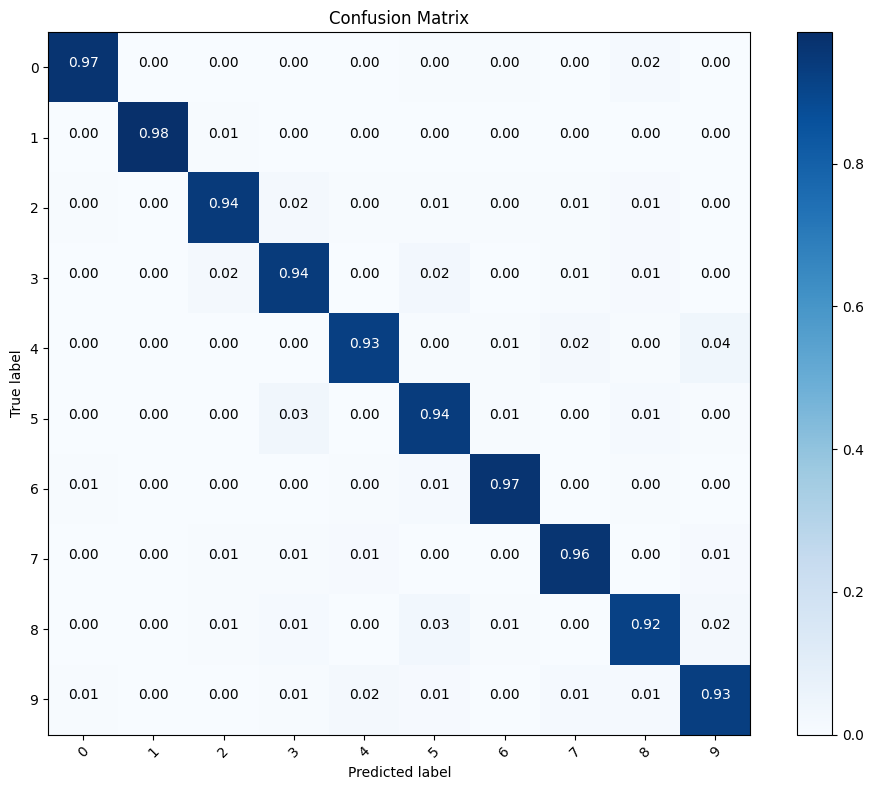

{'Test Accuracy': 0.9476785714285715, 'Training Loss': 0.25824376940727234, 'Validation Loss': 0.19214771687984467}


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint



class CNN2Wrapper:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.results = {}
        self.history = None
        self.model = None
        self.best_model_path = 'best_model.h5'

    def prepare_data(self):
        lb = LabelBinarizer()
        y = lb.fit_transform(self.y)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, y, test_size=0.4, random_state=42, stratify=self.y)
        self.X_train = self.X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
        self.X_test = self.X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    def create_resnet_model(self):
        base_model = tf.keras.applications.ResNet50(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
        base_model.trainable = False  # Freeze the base model

        model = Sequential([
            tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (32, 32))),  # Resize to 32x32
            tf.keras.layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x)),  # Convert grayscale to RGB
            base_model,
            GlobalAveragePooling2D(),
            Dense(512, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ])

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def evaluate_model(self):
        self.prepare_data()
        self.model = self.create_resnet_model()
        
        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            print("Using GPU")
        else:
            print("No GPU found, using CPU")

        checkpoint = ModelCheckpoint(self.best_model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
        
        self.history = self.model.fit(
            self.X_train, self.y_train,
            epochs=100,  # Start with a reasonable number of epochs
            validation_data=(self.X_test, self.y_test),
            callbacks=[checkpoint],
            verbose=1,  # Maximum verbosity
            batch_size=64  # Adjust this as needed
        )
        
        self.model = tf.keras.models.load_model(self.best_model_path)

        y_pred = self.model.predict(self.X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(self.y_test, axis=1)

        test_accuracy = accuracy_score(y_true, y_pred_classes)

        results = {
            "Test Accuracy": test_accuracy,
            "Training Loss": self.history.history['loss'][-1],
            "Validation Loss": self.history.history['val_loss'][-1]
        }

        self.results = results

        self.plot_history()
        self.plot_confusion_matrix(y_true, y_pred_classes)

    def plot_history(self):
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='upper right')

        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['accuracy'], label='Training Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        
        plt.show()

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred, normalize='true')
        plt.figure(figsize=(10, 8))
        plt.imshow(cm, interpolation='nearest', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(len(np.unique(y_true)))
        plt.xticks(tick_marks, tick_marks, rotation=45)
        plt.yticks(tick_marks, tick_marks)

        fmt = '.2f'
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    def predict(self, X_new_df, save_csv=False):
        X_new = X_new_df.values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
        X_new = tf.image.resize(X_new, (32, 32))  # Resize to 32x32
        predictions = self.model.predict(X_new)
        predicted_classes = np.argmax(predictions, axis=1)
        
        results_df = pd.DataFrame({'ImageId': np.arange(1, len(predicted_classes) + 1), 'Label': predicted_classes})
        
        if save_csv:
            results_df.to_csv("submission.csv", index=False)
        
        return results_df

    def print_results(self):
        print(self.results)


# Usage example
X = train.drop("label", axis=1).values
y = train["label"].values

cnn2_wrapper = CNN2Wrapper(X, y)
cnn2_wrapper.evaluate_model()
cnn2_wrapper.print_results()


In [8]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

class XGBoostOptunaWrapper:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.model = None
        self.best_params = None
        self.study = None

    def prepare_data(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42, stratify=self.y)

    def objective(self, trial):
        param = {
            'objective': 'multi:softmax',
            'num_class': len(np.unique(self.y)),
            'eval_metric': 'mlogloss',
            'booster': 'gbtree',
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'eta': trial.suggest_float('eta', 0.01, 0.3, log=True),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
            'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
            'tree_method': 'hist',  # Use GPU if available
            'device': 'cuda'
        }

        num_boost_round = trial.suggest_int('num_boost_round', 100, 1000)

        dtrain = xgb.DMatrix(self.X_train, label=self.y_train)
        dtest = xgb.DMatrix(self.X_test, label=self.y_test)
        
        model = xgb.train(param, dtrain, num_boost_round=num_boost_round, evals=[(dtest, 'eval')], early_stopping_rounds=50, verbose_eval=False)
        preds = model.predict(dtest)
        accuracy = accuracy_score(self.y_test, preds)

        return accuracy

    def optimize_hyperparameters(self, n_trials=100):
        self.study = optuna.create_study(direction='maximize')
        self.study.optimize(self.objective, n_trials=n_trials)

        self.best_params = self.study.best_params
        print("Best Hyperparameters:", self.best_params)

    def train_best_model(self):
        dtrain = xgb.DMatrix(self.X_train, label=self.y_train)
        dtest = xgb.DMatrix(self.X_test, label=self.y_test)

        # num_boost_round is now used here directly from best_params
        self.model = xgb.train(self.best_params, dtrain, num_boost_round=self.best_params['num_boost_round'], evals=[(dtest, 'eval')], early_stopping_rounds=50, verbose_eval=True)

    def evaluate_model(self):
        dtest = xgb.DMatrix(self.X_test, label=self.y_test)
        preds = self.model.predict(dtest)
        accuracy = accuracy_score(self.y_test, preds)
        print(f"Test Accuracy: {accuracy:.4f}")

    def predict(self, X_new):
        dnew = xgb.DMatrix(X_new)
        preds = self.model.predict(dnew)
        return preds

In [ ]:
wrapper = XGBoostOptunaWrapper(X, y)
wrapper.prepare_data()
wrapper.optimize_hyperparameters(n_trials=100)  # Run a thorough search
wrapper.train_best_model()
wrapper.evaluate_model()

[I 2024-08-25 18:17:01,706] A new study created in memory with name: no-name-bcff7bc3-235b-49da-ad83-a1bb37e2b788
[I 2024-08-25 18:17:12,502] Trial 0 finished with value: 0.9419047619047619 and parameters: {'max_depth': 3, 'eta': 0.2515300245167582, 'gamma': 3.9907247897684117, 'min_child_weight': 4.3878830243381035, 'subsample': 0.7297319288250739, 'colsample_bytree': 0.7434833552830641, 'lambda': 0.00593697161511061, 'alpha': 6.791957406513236, 'num_boost_round': 263}. Best is trial 0 with value: 0.9419047619047619.
[I 2024-08-25 18:17:41,838] Trial 1 finished with value: 0.9608333333333333 and parameters: {'max_depth': 9, 'eta': 0.1209257886026186, 'gamma': 2.999100152833872, 'min_child_weight': 3.0636601935792127, 'subsample': 0.9967693186460729, 'colsample_bytree': 0.8645395800985693, 'lambda': 0.09377172724001764, 'alpha': 0.8366726461314015, 'num_boost_round': 752}. Best is trial 1 with value: 0.9608333333333333.
[I 2024-08-25 18:18:14,559] Trial 2 finished with value: 0.9590476